#**About Customer Spending Score Dataset**
**Variables** - There are 4 attributes in each case of the dataset. They are:
* Gender - Gender of customer either Male or Female.
* Age - Age of customer in completed years.
* Annual Income - Yearly income of customer in K$.
* Spending Score - Score of customer between 1 to 100.
###This data set is created only for the learning purpose of the customer segmentation concepts. I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm).

#**Importing Libraries**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

#**Reading Data from Data Source**

In [35]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Customer%20Spending%20Score.csv")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


#**Exploring Data**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [37]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


In [38]:
df.isna().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


#**Preprocessing as per requirement**

In [39]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(dtype=np.int64)
df[["Gender"]]=oe.fit_transform(df[["Gender"]])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15000,39
1,1,21,15000,81
2,0,20,16000,6
3,0,23,16000,77
4,0,31,17000,40
...,...,...,...,...
195,0,35,120000,79
196,0,45,126000,28
197,1,32,126000,74
198,1,32,137000,18


In [40]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [41]:
x=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

##**Scaling of variables**

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
new_df=pd.DataFrame(x_ss,columns=x.columns)

##**KMeans Clustering algorithm**

In [43]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
cluster_labels=km.fit_predict(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##**Elbow method for finding optimal value of 'k'**

In [44]:
wcss=[]
for i in range(1,20):
  km=KMeans(n_clusters=i)
  km.fit(new_df)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [45]:
pd.DataFrame({"Clusters":range(1,20),"WCSS":wcss})

,Clusters,WCSS
0,1,800.000000
1,2,588.802677
2,3,476.860069
3,4,386.714786
4,5,331.264999
5,6,275.957989
6,7,236.810527
7,8,199.716626
8,9,174.235477
9,10,152.086763


Text(0, 0.5, 'WCSS')

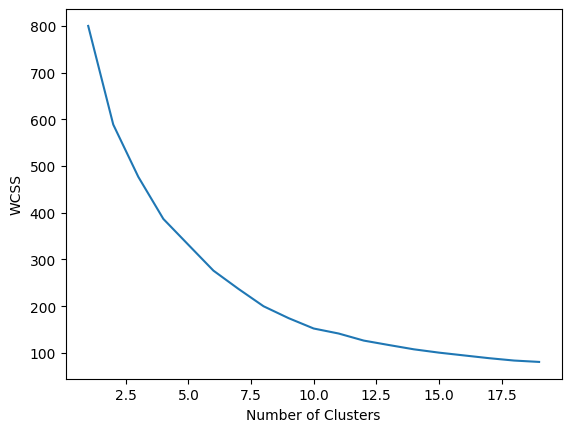

In [46]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

##**Conclusion** - Elbow method gives 10 as the optimal value for 'k'